In [6]:
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
print(keras.__version__)

2.4.3


In [7]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
def build_model(activa):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
  model.add(Activation(activa))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation(activa))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activa))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation(activa))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activa))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  return model

def train_cnn(model, epochs):
  if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
    # # Save model and weights
    # if not os.path.isdir(save_dir):
    #     os.makedirs(save_dir)
    # model_path = os.path.join(save_dir, model_name)
    # model.save(model_path)
    # print('Saved trained model at %s ' % model_path)

    # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=0)
  print('Accuracy:', scores[1])
  return scores[1]
    # cnn_performance.append(scores[1])
    # print('Test loss:', scores[0])
    # print('Test accuracy:', scores[1])

act_functions =['relu', 'sigmoid']
models_dict ={}
for act_function in act_functions:
  models_dict.update({act_function:build_model(act_function)})

act_performance_dict ={}
for item in models_dict.items():
  act_function, model = item
  temp_performance =[]
  for i in range(10):
    print("validate epoch:{}".format(i+1))
    performance = train_cnn(model, i+1)
    temp_performance.append(performance)
  print("act_performance_dict", act_performance_dict)
  print("temp_performance",temp_performance)
  act_performance_dict.update({act_function:temp_performance})  

print(act_performance_dict)

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
validate epoch:1
Not using data augmentation.
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8313 - accuracy: 0.3292 - val_loss: 1.5571 - val_accuracy: 0.4329
Accuracy: 0.43290001153945923
validate epoch:2
Not using data augmentation.
Epoch 1/2
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5127 - accuracy: 0.4500 - val_loss: 1.3755 - val_accuracy: 0.5058
Epoch 2/2
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3723 - accuracy: 0.5011 - val_loss: 1.2526 - val_accuracy: 0.5545
Accuracy: 0.5544999837875366
validate epoch:3
Not using data augmentation.
Epoch 1/3
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2793 - accuracy: 0.5434 - val_loss: 1.2062 - val_accuracy: 0.5661
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2057 - accuracy: 0.5700 

To avoid repetitive training, I recorded one result from previous training.

In [4]:
act_performance_dict={'relu': [0.4465000033378601, 0.5627999901771545, 0.6442999839782715, 0.6797000169754028, 0.7312999963760376, 0.7508000135421753, 0.7731999754905701, 0.7756999731063843, 0.7692999839782715, 0.7840999960899353], 'sigmoid': [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2971999943256378, 0.3671000003814697, 0.4027999937534332, 0.4535999894142151, 0.4912000000476837, 0.5238000154495239, 0.5351999998092651]}

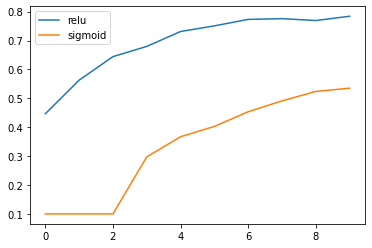

In [5]:
df = pd.DataFrame(act_performance_dict)
fig = df.plot()
fig = fig.get_figure()
fig.savefig('Q2.pdf')

In [9]:
act_performance_dict

{'relu': [0.43290001153945923,
  0.5544999837875366,
  0.628000020980835,
  0.6825000047683716,
  0.7325000166893005,
  0.7576000094413757,
  0.7588000297546387,
  0.7706999778747559,
  0.7803999781608582,
  0.7750999927520752],
 'sigmoid': [0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.2809999883174896,
  0.34119999408721924,
  0.37720000743865967,
  0.4271000027656555,
  0.4514000117778778,
  0.4952999949455261,
  0.5188999772071838]}

<h1> why did some models perform better or worse than
other models and are the results consistent with the theory?</h1>



*   The biggest advantage of ReLu is indeed non-saturation of its gradient, which makes the model with ReLU performs bettern than sigmoid.
*   Moreover, the model with ReLU is less expensive in computation resource.

